In [1]:
%pylab inline
import scipy
import mnist
from matplotlib import animation
import sys
import datetime
import imageio
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
def clone_simple(network):
    """Asexual Reproduction code
    """
    
    weights_new = []
    for i in range(len(network.weights)):
        weights_new.append(np.random.normal(network.weights[i],0.03))
    
    thresholds_new = []
    for i in range(len(network.thresholds)):
        thresholds_new.append(np.random.normal(network.thresholds[i],0.03))
        
    sensitivities_new = []
    for i in range(len(network.thresholds)):
        sensitivities_new.append(np.random.normal(network.sensitivities[i],0.08))

        
    return neural_network(weights_new,thresholds_new,sensitivities_new)


def first_gen(nums):
    """Randomly generate the first generation of images
    """
    first_gen = []
    for i in range(nums):
        w1 = np.random.rand(28,28)
        first_gen.append(w1)
    return first_gen
        
def evaluate(current_generation,jungle):
    
    """Function that tests the training images
    """
    
    sucess = []
    for critter in current_generation:
        hunt=[]
        for j in range(len(jungle.prey)):
            critter.evaluate_inputs(jungle.prey[j])
            hunt.append(critter.prediction)
        sucess.append(list(np.array(hunt) == np.array(jungle.jugular)).count(True)*1./len(jungle.prey))
    
    return sucess

def next_generation(current_generation,success):
    """Generate next generation through asexual reproduction
    """
    best = np.argsort(success)[::-1][:int(len(sucess)/10)]
    survivors = np.array(first_gen1)[best]
    next_gen = []
    for i in range(len(survivors)):
        for j in range(10):
            next_gen.append(clone_simple(survivors[i]))

    return next_gen

def sexy_times(dude,lady,randomize = 0.05):
    """
    Sexual Reproduction code
    """
    genome = np.random.rand(28,28)>.5
    inv_genome = 1-genome
    baby_genome = dude*genome+lady*inv_genome
    baby = np.random.normal(baby_genome,randomize)
    return baby

def sexy_times_average(dude,lady,randomize = 0.05):
    """
    Sexual Reproduction code that averages parent "genomes" instead of choosing one or the other
    """
    genome = np.random.rand(28,28)>.5
    inv_genome = 1-genome
    baby_genome = (dude+lady)/2
    baby = np.random.normal(baby_genome,randomize)
    return baby


def hunt(gener,local_min = False):
    """Determines which images "survive" after 
    """
    
    costs = []
    for i in range(len(gener)):
        costs.append(np.sqrt(np.sum((gener[i]-test2)**2))+.8*local_min*np.sqrt(np.sum((gener[i]-test)**2)))

    costs = np.array(costs)
    survivors = np.argsort(costs)[:200]
    costly = costs[survivors]
    return survivors,costly


def new_generation(gener,survivors,average = False):
    """
    Creates the next generation through sexual reproduction
    """
    next_gen = []
    for i in range(len(survivors)):
        dude = gener[survivors[i]]
        for j in range(10):
            gimme_yo_number = np.random.randint(0,len(survivors))
            lady = gener[survivors[gimme_yo_number]]
            if average:
                baby = sexy_times_average(dude,lady)
            elif not average:    
                baby = sexy_times(dude,lady)
            next_gen.append(baby)
    return next_gen



In [3]:
images = mnist.train_images()
labels = mnist.train_labels()

In [4]:
test = images[13]/np.amax(images[13])
test2 = images[135]/np.amax(images[130])

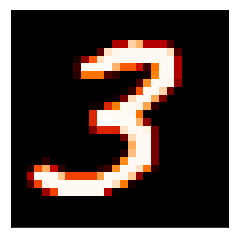

In [5]:
plt.figure()
plt.imshow(test2,cmap='gist_heat',vmin=0,vmax=1)
plt.xticks([])
plt.yticks([])
plt.savefig('three.png',bbox_inches = 'tight')

Evaluate 120 generations of evolution

In [6]:
keep_tract = []
nummy = 200
next_gen = first_gen(nummy)
switch = 0

cost_ev = []
for i in range(120):
    surv,coster = hunt(next_gen,local_min = False)
    keep_tract.append(next_gen[0])
    cost_ev.append(np.median(coster))
    next_gen = new_generation(next_gen,surv)

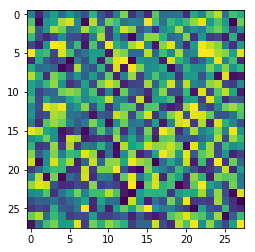

In [7]:
plt.imshow(first_gen(nummy)[0])

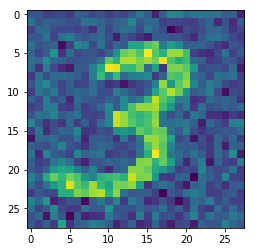

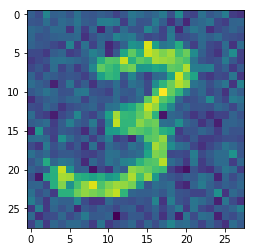

In [8]:
plt.imshow(next_gen[200])
plt.figure()
plt.imshow(next_gen[10])

In [9]:
keep_tract

[array([[ 0.97476283,  0.94316863,  0.02575729,  0.10825491,  0.71418112,
          0.17070095,  0.9457463 ,  0.25568309,  0.79445516,  0.35214372,
          0.43271806,  0.43100215,  0.51575777,  0.83883527,  0.71756156,
          0.81508822,  0.95808318,  0.44736951,  0.98999901,  0.99873137,
          0.66162717,  0.6167518 ,  0.46941596,  0.53395283,  0.43488254,
          0.86336379,  0.24718332,  0.42396768],
        [ 0.80627977,  0.71138701,  0.96534151,  0.13488444,  0.09419709,
          0.30889265,  0.75539954,  0.28288095,  0.66597546,  0.43484429,
          0.15794555,  0.08357128,  0.01602256,  0.50763162,  0.87941834,
          0.11308712,  0.26626429,  0.29667339,  0.9271505 ,  0.19137721,
          0.54378531,  0.13008   ,  0.87256203,  0.64682428,  0.73525034,
          0.06734889,  0.07391025,  0.32778893],
        [ 0.28182432,  0.18787692,  0.61350014,  0.24830536,  0.41920401,
          0.66057353,  0.32516457,  0.73648967,  0.68676901,  0.24188977,
          0.29

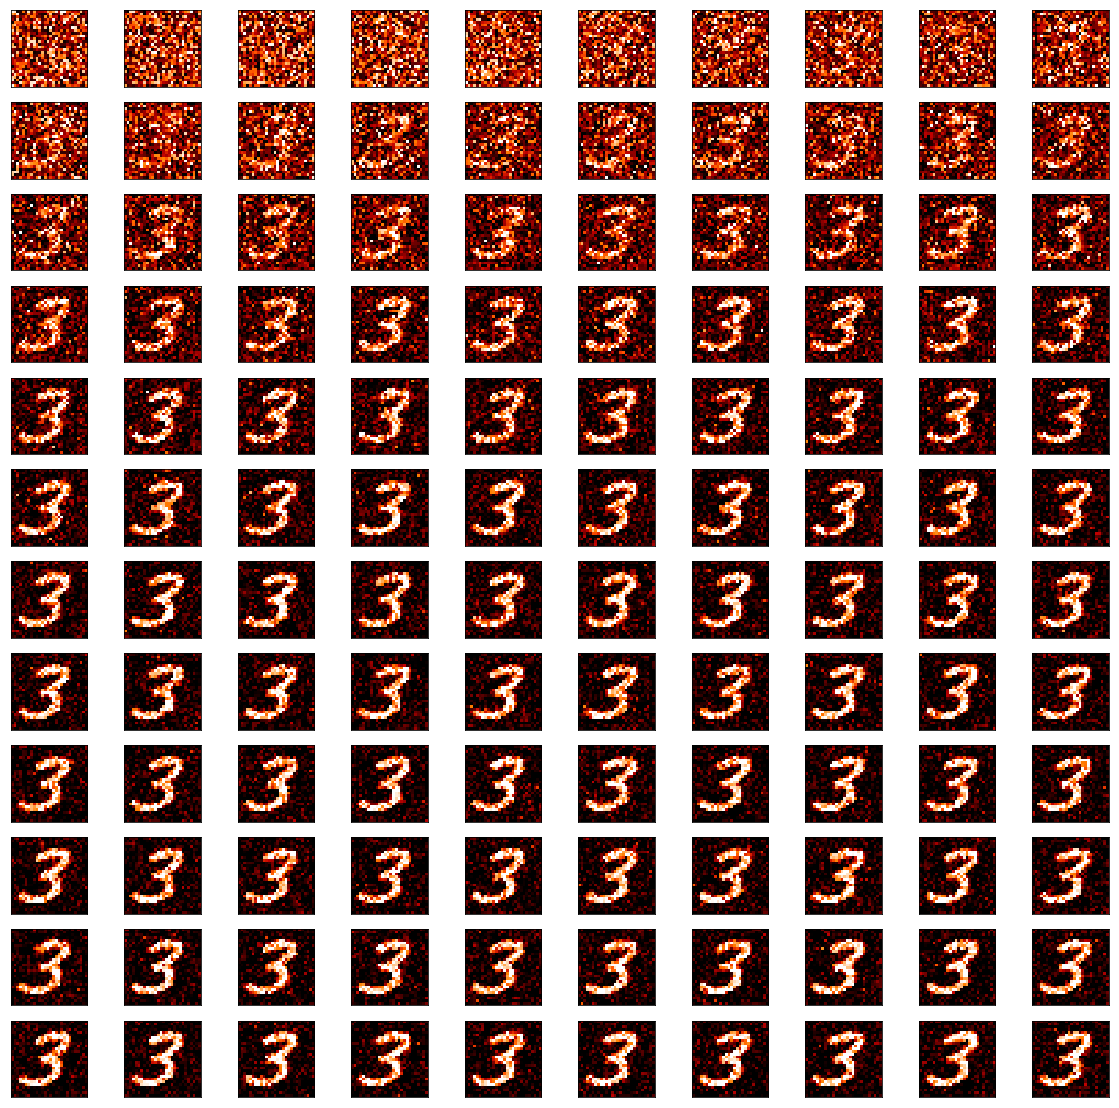

In [10]:
plt.figure(figsize = (20,20))
for ii in range(len(keep_tract)):
    plt.subplot(12,10,ii+1)
    ax = plt.gca()
    plt.xticks([])
    plt.yticks([])
    plt.imshow(keep_tract[ii],cmap='gist_heat',vmin=0,vmax=1)

Create animation from the frames

/Users/johnip/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


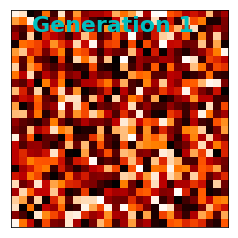

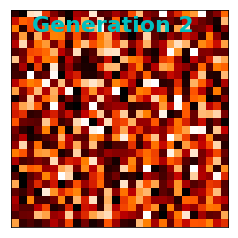

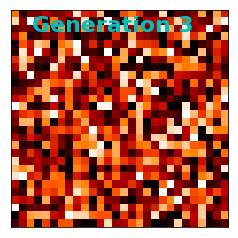

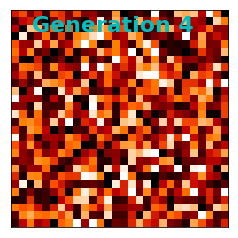

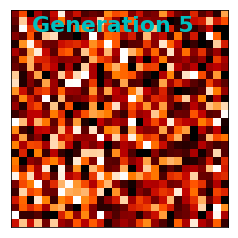

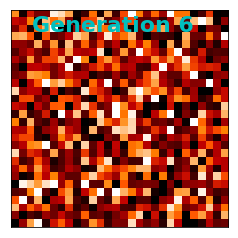

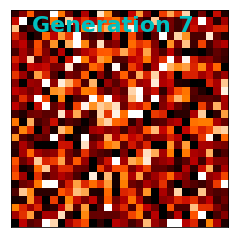

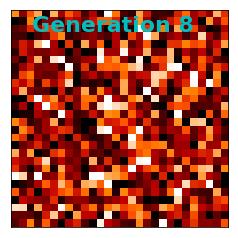

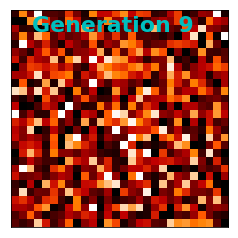

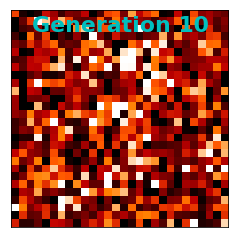

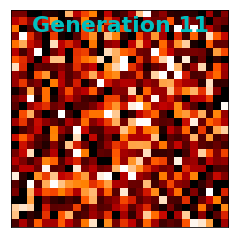

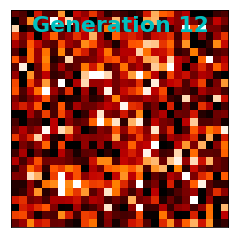

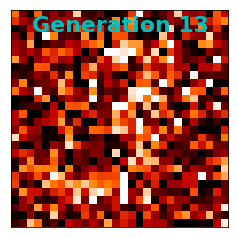

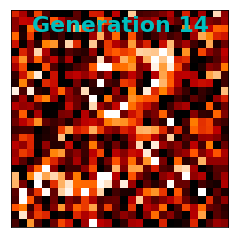

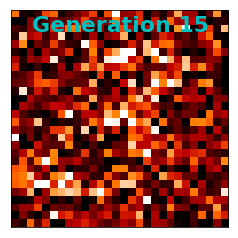

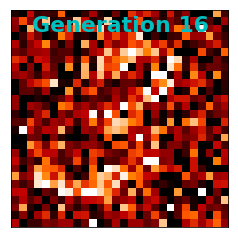

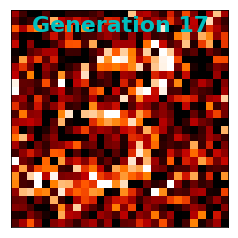

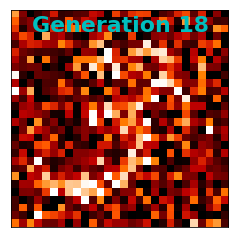

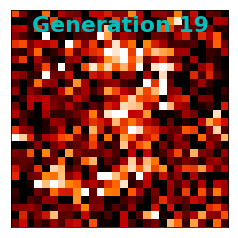

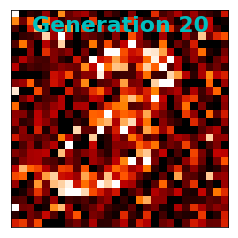

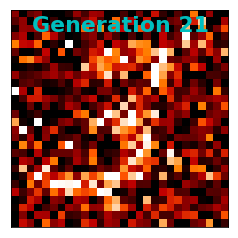

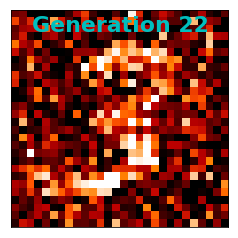

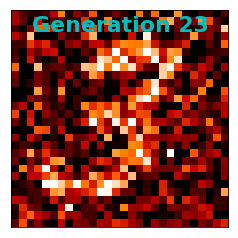

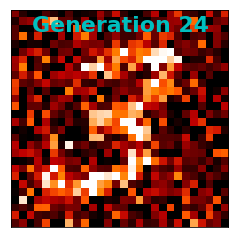

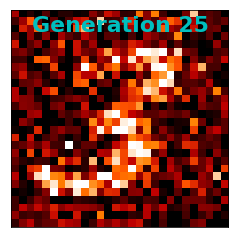

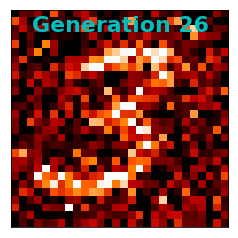

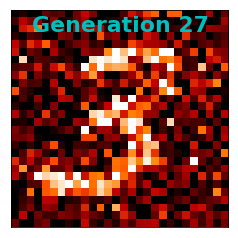

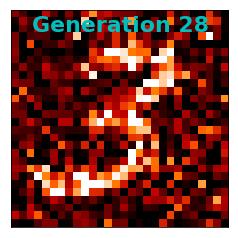

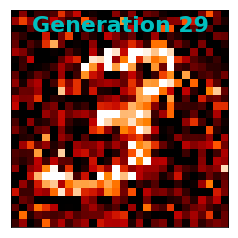

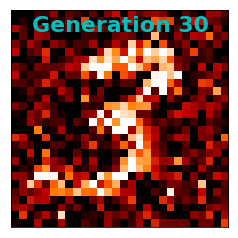

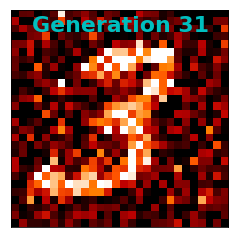

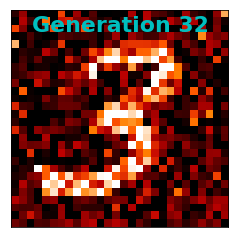

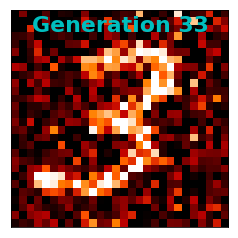

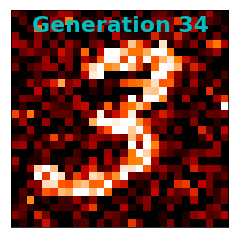

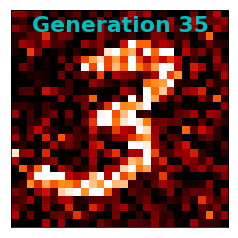

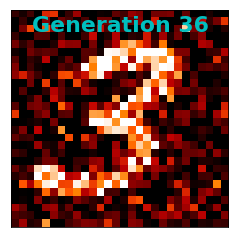

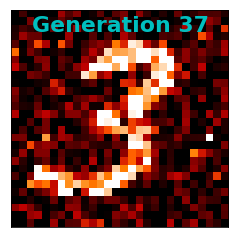

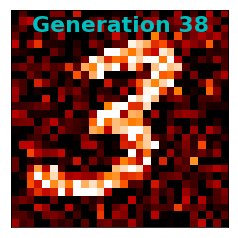

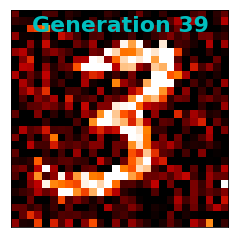

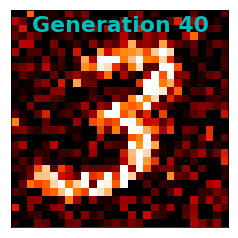

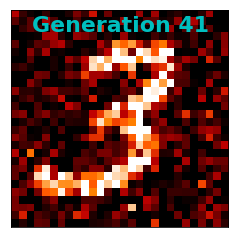

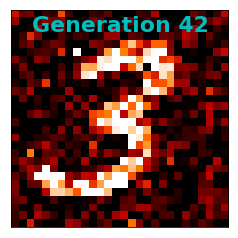

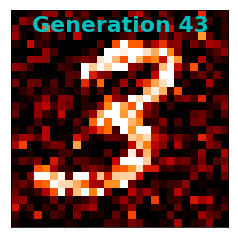

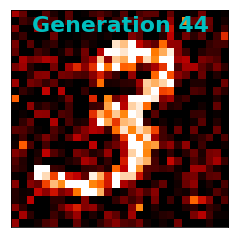

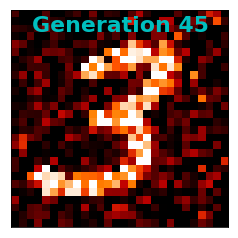

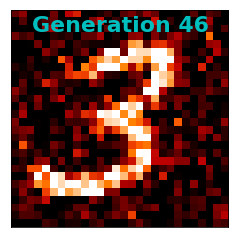

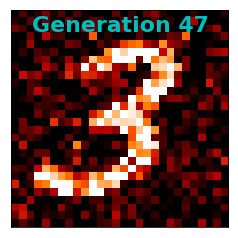

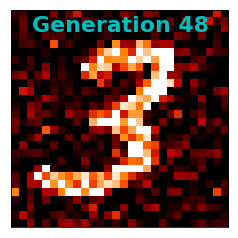

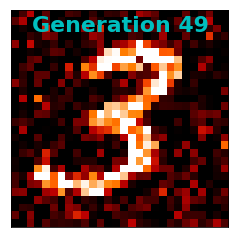

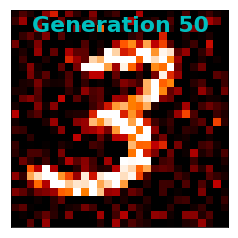

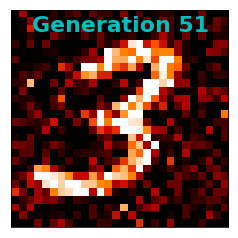

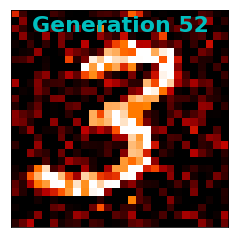

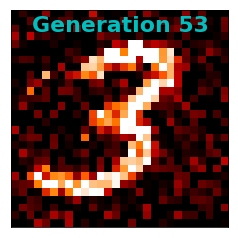

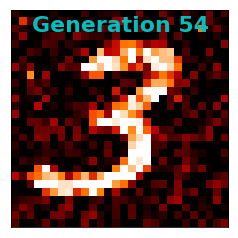

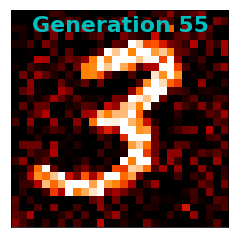

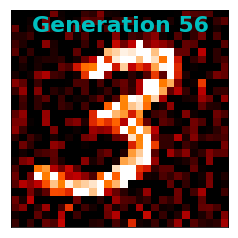

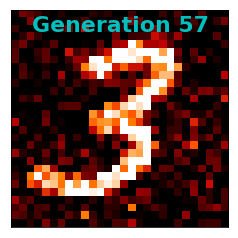

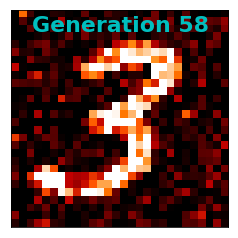

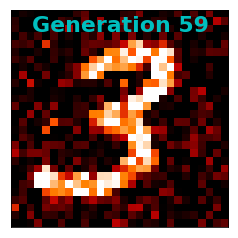

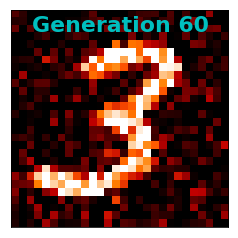

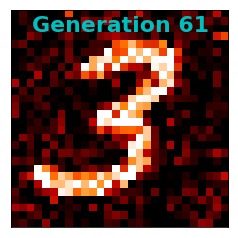

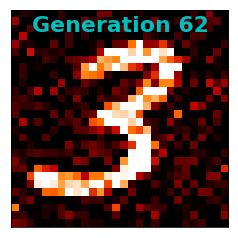

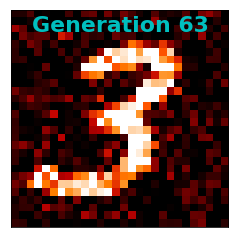

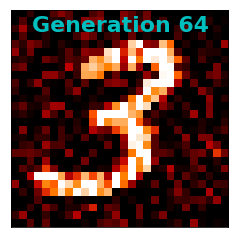

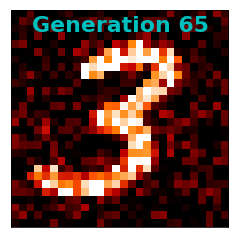

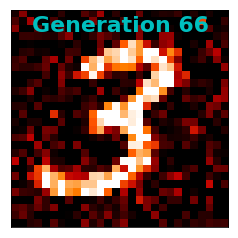

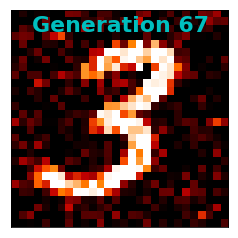

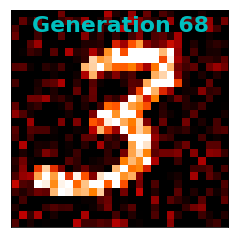

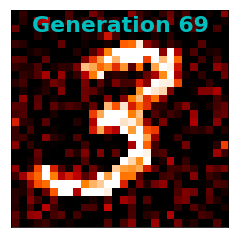

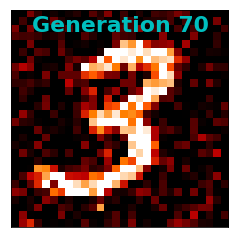

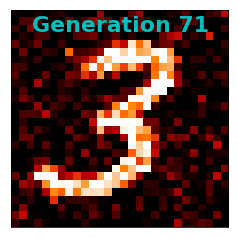

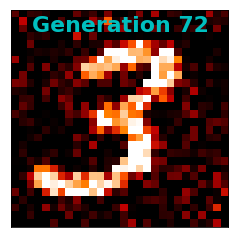

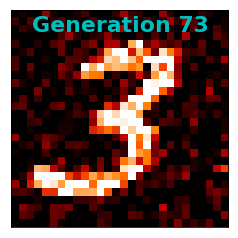

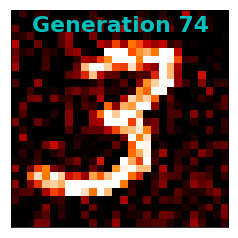

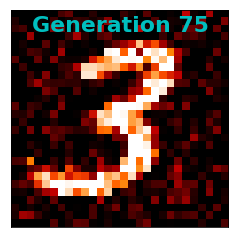

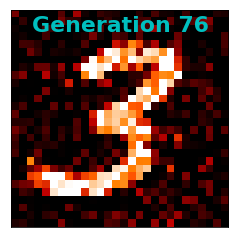

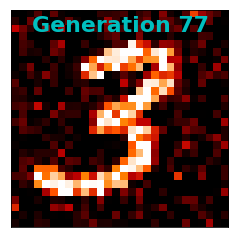

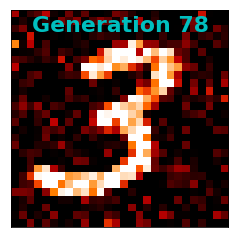

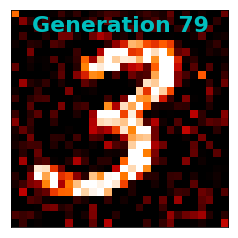

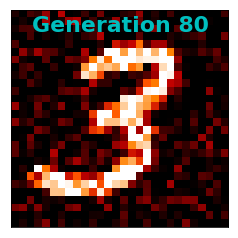

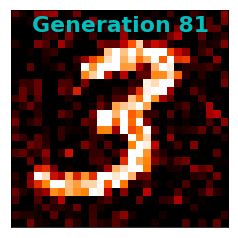

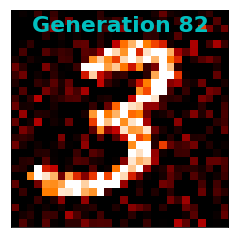

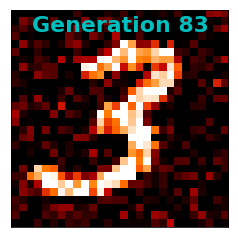

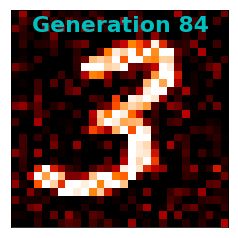

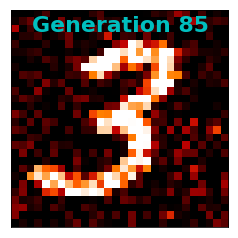

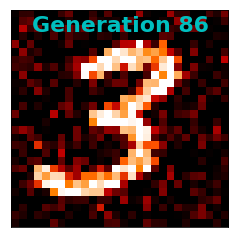

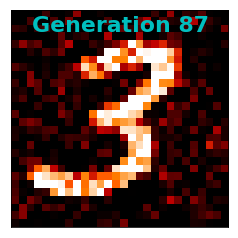

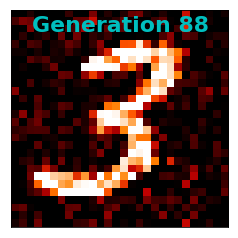

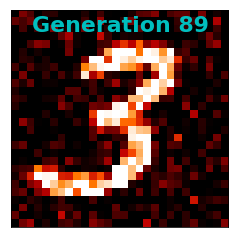

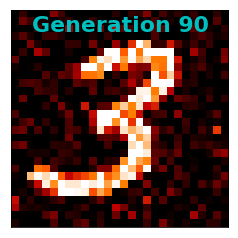

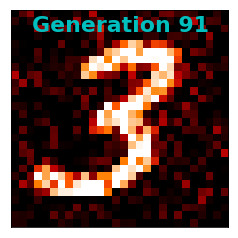

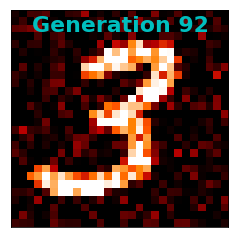

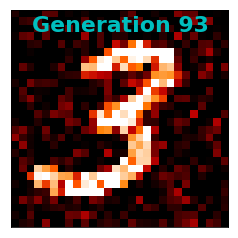

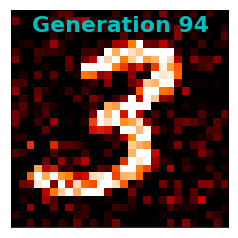

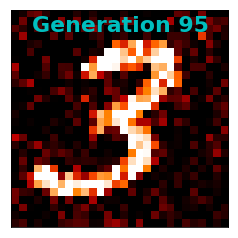

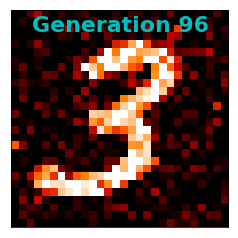

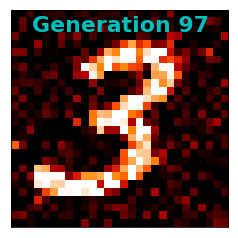

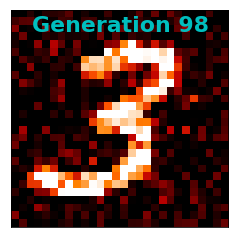

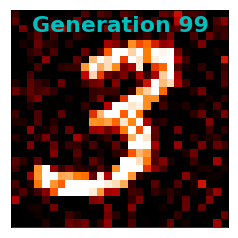

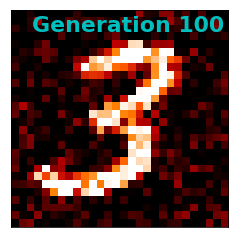

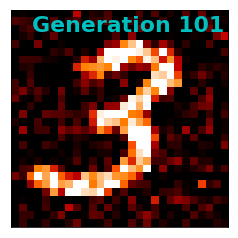

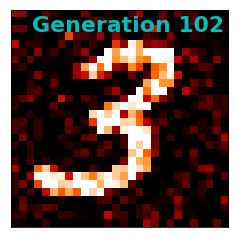

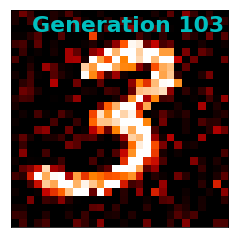

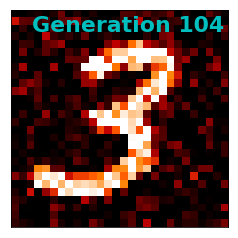

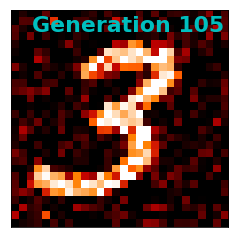

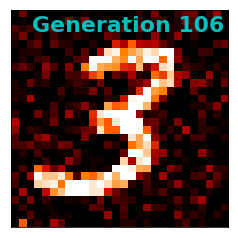

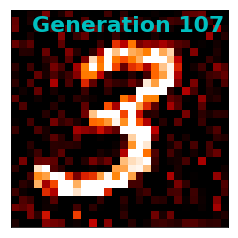

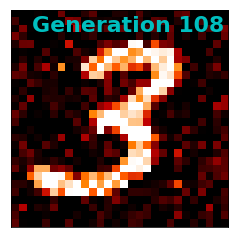

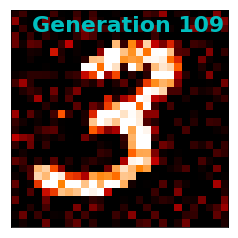

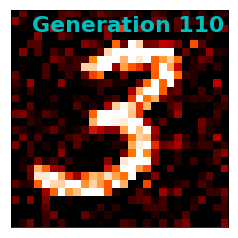

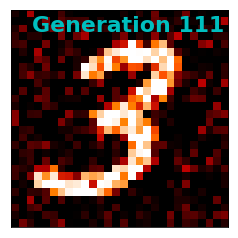

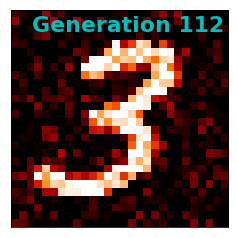

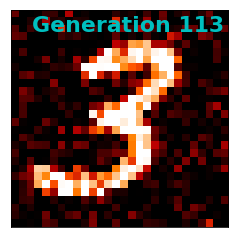

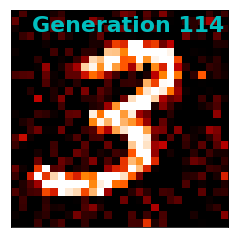

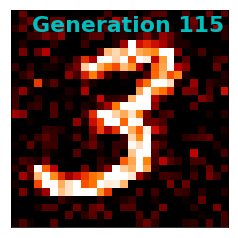

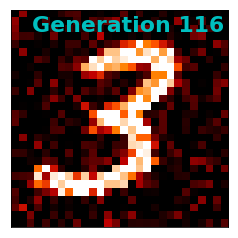

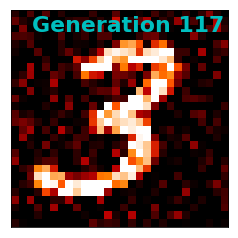

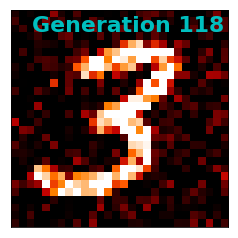

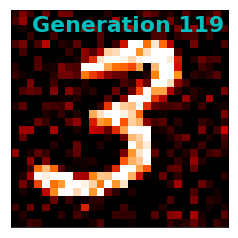

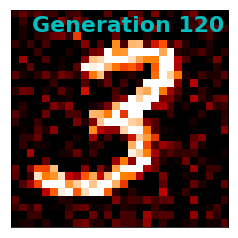

In [22]:
plt.figure()
for ii in range(len(keep_tract)):
    #plt.subplot(12,10,ii+1)
    plt.figure()
    ax = plt.gca()
    plt.xticks([])
    plt.yticks([])
    plt.imshow(keep_tract[ii],cmap='gist_heat',vmin=0,vmax=1)
    plt.text(.1,.9,'Generation {}'.format(ii+1),transform=ax.transAxes,fontsize=22,color='c',weight='bold')
    plt.savefig('moth_{}.png'.format(ii))

In [29]:
28**2

784

In [27]:
filenames = []
for i in np.arange(60):
    filenames.append('moth_{}.png'.format(i))

In [28]:
duration=.2

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
output_file = 'Gif-%s.gif' % datetime.datetime.now().strftime('%Y-%M-%d-%H-%M-%S')
imageio.mimsave(output_file, images, duration=duration)


In [25]:
duration=.2
output_file = 'Gif-%s.gif' % datetime.datetime.now().strftime('%Y-%M-%d-%H-%M-%S')
imageio.mimsave(output_file, keep_tract, duration=duration)

In [10]:
for i in range(len(cost_ev)):
    if i>5:
        print((cost_ev[i] - cost_ev[i-5])/cost_ev[i])

-0.245717029186
-0.262370630223
-0.260599896032
-0.25027981446
-0.14335721389
-0.0879458122127
-0.062103730697
-0.0508298564079
-0.0451789944587
-0.0430339845052
-0.0423511187889
-0.0423795877966
-0.0425246143054
-0.0441278769939
-0.0446739596834
-0.0452190089111
-0.0458100022482
-0.0463552431697
-0.0460098727221
-0.04637953493
-0.0457684593712
-0.0458576420105
-0.0455330283184
-0.04614517595
-0.0467338131615
-0.0473473064134
-0.0481926927875
-0.0495893601236
-0.0498217695436
-0.0499107703298
-0.0500265553426
-0.0509255135161
-0.0506229276526
-0.0507200815114
-0.0511893927281
-0.0528119129493
-0.0523749292741
-0.053146630499
-0.0546538614188
-0.0553803690015
-0.0547808582619
-0.0558584348612
-0.0565627400136
-0.0562582769864
-0.0569053353472
-0.0578182103378
-0.0580704127369
-0.0590343696692
-0.0589574257406
-0.0589979890411
-0.0590451154925
-0.0592411341853
-0.059073337802
-0.0602888853813
-0.0615256014845
-0.0634429301034
-0.0648185139756
-0.0668525027516
-0.0682197753445
-0.06907141

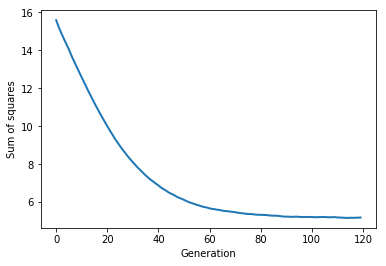

In [141]:
plt.plot(cost_ev,lw = 2)
#plt.plot(cost_ev_av1,lw = 2)
#plt.plot(cost_ev_av2,lw = 2)
#plt.plot(cost_ev_av3,lw = 2)
#plt.plot(cost_ev_av4,lw = 2)

plt.xlabel('Generation')
plt.ylabel('Sum of squares')